# Import Library

In [25]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Read & Analyze Data

In [26]:
file_path = 'training_data.csv'
df = pd.read_csv(file_path)
df.head()

,size (square feet),number of bedrooms,price ($)
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


- Comment: Ta nhận thấy trong tập dữ liệu huấn luyện training_data.csv có 3 cột dữ liệu tương ứng với :
    size(square feet) : kích thước của căn nhà, number of bedroom : số lượng phòng ngủ , price($) : giá nhà. 
    Giữa 3 biến này có mối quan hệ chặt chẽ với nhau.

In [27]:
df.describe()

,size (square feet),number of bedrooms,price ($)
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


- Comment: Dựa trên thông tin mô tả của bảng dữ liệu huấn luyện, ta thấy được
    + count : có 47 mẫu huấn luyện mỗi mẫu gồm 3 thành phần ( size (square feer), number of bedrooms, price($))
    + mean : giá trị trung bình của cột ứng với mỗi biến ( size (square feer), number of bedrooms, price($))
    + std : độ lệch chuẩn của cột ứng với mỗi biến ( size (square feer), number of bedrooms, price($))
    + min : giá trị nhỏ nhất cột ứng với mỗi biến ( size (square feer), number of bedrooms, price($))
    + 25%, 50%, 75% : Giá trị mà (25% , 50%, 75%) giá trị của mỗi cột với mỗi biến ( size (square feer), number of bedrooms, price($)) nhỏ hơn hoặc bằng
    + max : giá trị lớn nhất cột ứng với mỗi biến ( size (square feer), number of bedrooms, price($))


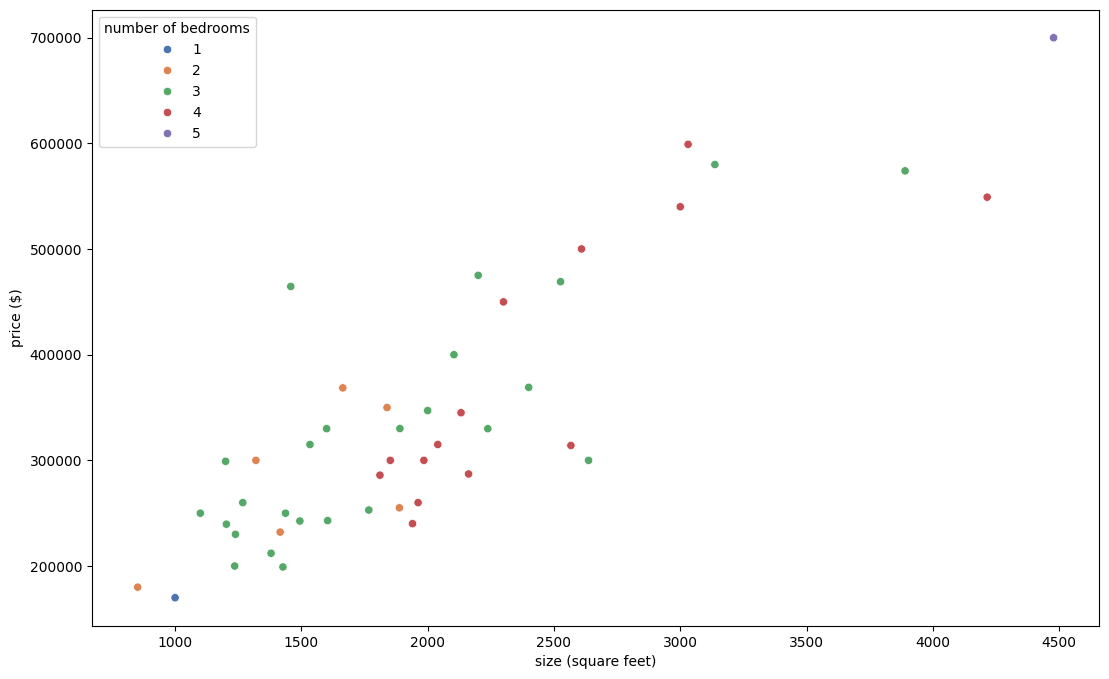

In [28]:
plt.figure(figsize=(13,8))
ax = sns.scatterplot(data=df, x='size (square feet)', y='price ($)', 
                     hue='number of bedrooms', palette='deep')
plt.show()

- Comment: Từ đồ thị ta có thể nhận thấy khi number of bedrooms và size(squarefeet) tăng lên thì price($) cũng tăng theo và hình dạng đồ thị gần như là một đường thẳng.

- Ta có thể sử dụng phương pháp hồi quy tuyến tính để xây dựng model tìm ra mối quan hệ giữa 3 biến (size(square feet), number of bedrooms, price($)) 

# Helper Functions

In [29]:
def standardize_train_set(X):
    mu = np.mean(X,axis=0)
    sigma = np.std(X,axis=0)
    X_norm = (X - mu)/sigma
    return X_norm, mu, sigma

In [30]:
def standardize_test_set(X, mu, sigma):
    X_norm = (X - mu)/ sigma
    return X_norm

In [31]:
class LinearRegression:
    def __init__(self, alpha=0.001, iters=10, verbose=False):
        self.alpha = alpha
        self.iters = iters
        self.verbose = verbose
        self.theta = None
    
    def calculate_absolute_error(self, X, y, theta):
        m = len(y)
        h_theta = np.sum(np.array(X)*np.array(theta),axis =1)
        loss = np.array(h_theta)- np.array(y)
        J = np.sum((loss ** 2) / (2*m))
        return J
    
    def gradient(self, X, y, theta):
        m = len(y)

        h_theta = np.sum(np.array(X)*np.array(theta),axis =1)
        loss = np.array(h_theta)- np.array(y)

        dJ = np.sum(np.array(loss)*np.array(X).T,axis = 1)/m
        J = np.sum((loss ** 2) / (2*m))

        return (J, dJ)
    
    def gradient_descent(self, X, y):
        X = np.c_[np.ones(len(X),dtype='int64'), X]
        theta = np.zeros(X.shape[1])
        print(f'The total of training sample: {len(y)}')
        for i in range(self.iters):
            J, dJ = self.gradient(X,y,theta)

            theta = theta - self.alpha*dJ
            if self.verbose:
                print(f'Iter {i + 1}, loss = {self.calculate_absolute_error(X, y, theta)}')
        return theta
    
    def fit(self, X, y):
        self.theta = self.gradient_descent(X, y)
    
    def predict(self, X):
        results = []
        for Xi in X:
            prediction = np.dot(np.insert(Xi, 0, 1), self.theta)
            results.append(prediction)
            
        return results
    

# Main Function

## Train Model

In [32]:
#Load config
with open('config.json',) as f:
    configs = json.load(f)
#Feature-Label split

X = df[['size (square feet)', 'number of bedrooms']].values
y = df['price ($)'].values
#Standardize feature and Train model
X, mu, sigma = standardize_train_set(X)
model = LinearRegression(alpha= configs['alpha'], iters=configs['iters'], verbose=False)
model.fit(X, y)

The total of training sample: 47


## Visualize Model

In [33]:
x_surf, y_surf = np.meshgrid(np.linspace(df['size (square feet)'].min(), df['size (square feet)'].max()),
                 np.linspace(df['number of bedrooms'].min(), df['number of bedrooms'].max()))

surf_df = pd.DataFrame({'size (square feet)': x_surf.ravel(), 'number of bedrooms': y_surf.ravel()})
predicted = np.array(model.predict(standardize_test_set(surf_df.values, mu, sigma)))

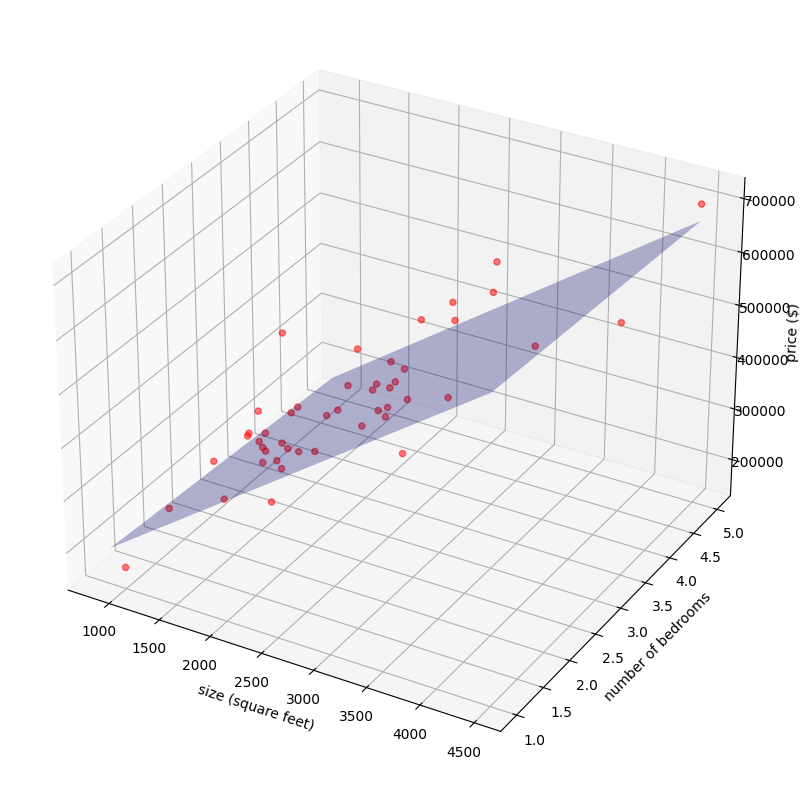

In [34]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['size (square feet)'], df['number of bedrooms']
           ,df['price ($)'], c='red', marker='o', alpha=0.5)
ax.plot_surface(x_surf, y_surf, predicted.reshape(x_surf.shape), color='b', alpha=0.3)

ax.set_xlabel('size (square feet)')
ax.set_ylabel('number of bedrooms')
ax.set_zlabel('price ($)')
plt.show()

- Comment: Hình vẽ là một biểu đồ 3D được sử dụng để trực quan hóa mối quan hệ giữa ba biến size(square feet), number of bedrooms, price($) so với mối quan hệ được model dự đoán.
    + Chấm đỏ biểu thị các mẫu dữ liệu học từ file training.csv là mối quan hệ giữa ba biến size(square feet), number of bedrooms, price($)
    + Mặt phẳng màu tím là mối quan hệ giữa 3 biến này được model dự đoán
- Dựa trên biểu đồ ta cũng có thể nhận thấy là các chấm đỏ có xu hướng tập trung gần (hoặc thuộc) mặt phẳng màu tím. Điều này cho thấy model dự đoán được gần đúng price($) dự trên size(square feet) và number of bedrooms.

## Predict Sample

In [35]:
sample = [1650, 3]

# Standardize the sample using mu and sigma obtained during training
sample_norm = (np.array(sample) - mu) / sigma

# Use the predict method to predict the price for the sample
y_predict = model.predict([sample_norm])

print(f'House price expected is {round(y_predict[0])}$')

House price expected is 293222$


## Save Results

In [36]:
#Save model
with open('model.json', 'w') as f:
    json.dump({'theta: ': model.theta.tolist()}, f)
#Save prediction result
with open('price.json', 'w') as f:
    result = {
        'size (square feet): ': sample[0],
        'number of bedrooms': sample[1],
        'price ($)': round(y_predict[0])
    }
    json.dump(result, f)